In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train_df.shape

(891, 12)

# Data Preprocessing

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
dc = ['PassengerId','Cabin','Name','Ticket']

In [ ]:
train_df.drop(dc,axis=1,inplace=True)

In [ ]:
test_df.drop(dc,axis=1,inplace=True)

In [ ]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
test_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [ ]:
train_df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [ ]:
train_df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
train_df.shape

(891, 8)

In [ ]:
test_df.shape

(418, 7)

In [ ]:
train_df['Age'].mean()

29.69911764705882

In [ ]:
train_df['Age'].fillna(29.69911764705882, inplace=True)

In [ ]:
test_df['Age'].fillna(29.69911764705882, inplace=True)

In [ ]:
train_df['Embarked'].mode()

0    S
dtype: object

In [ ]:
train_df.dropna(inplace = True)
test_df.dropna(inplace = True)
train_df.isnull().sum()
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
le_s = LabelEncoder()
le_e = LabelEncoder()

In [ ]:
train_df['Sex'] = le_s.fit_transform(train_df['Sex'])
train_df['Embarked'] = le_e.fit_transform(train_df['Embarked'])
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
le_s.classes_

array(['female', 'male'], dtype=object)

In [ ]:
test_df['Sex'] = le_s.transform(test_df['Sex'])
test_df['Embarked'] = le_e.transform(test_df['Embarked'])
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [ ]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [ ]:
X_train = train_df.iloc[:,1:].values
Y_train = train_df.iloc[:, 0].values
X_test = test_df.values
Y_test = test_df.values

In [ ]:
from sklearn.preprocessing import StandardScaler
scalee = StandardScaler()
X_train = scalee.fit_transform(X_train)
X_test = scalee.fit_transform(X_test)

# Data Visualization

In [ ]:
import matplotlib.pyplot as plt


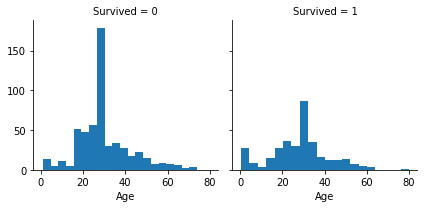

In [ ]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

       0    1
Sex  231  109
Sex   81  468


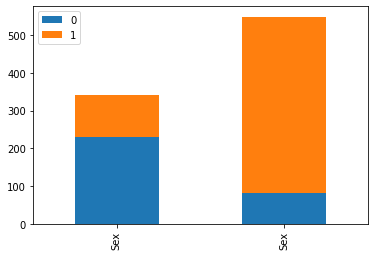

In [ ]:
def graph(s):
  sur = train_df[train_df['Survived']==1][s].value_counts()
  passed = train_df[train_df['Survived']==0][s].value_counts()
  df = pd.DataFrame([sur, passed])
  print(df.head())
  df.plot(kind = 'bar', stacked = True)
graph('Sex')


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


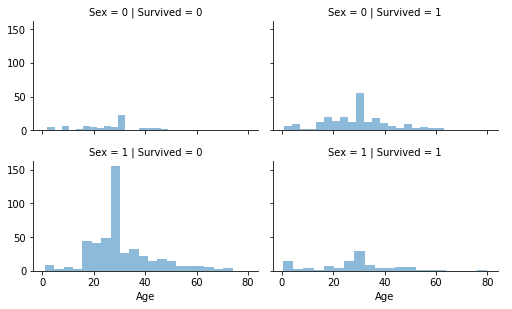

In [ ]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
logreg = LogisticRegression()


In [ ]:
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print("Survived", sum(Y_pred!=0))
print("NOT Survived", sum(Y_pred==0))

Survived 150
NOT Survived 267


In [ ]:
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print('The accuracy of the Logistic Regression is',acc_log)

The accuracy of the Logistic Regression is 79.98


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print('The accuracy of the Random Forest is',acc_random_forest)


The accuracy of the Random Forest is 98.2


#SVM

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()

In [ ]:
clf.fit(X_train, Y_train)
acc_clf = clf.score(X_train, Y_train) 
print('The accuracy of the SVM is',acc_clf)

The accuracy of the SVM is 0.8380202474690663


#XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [ ]:
model = XGBClassifier(learning_rate=0.3,n_estimators=100)

In [ ]:
kfold =KFold(n_splits=10, random_state=7)
result =cross_val_score(model,X_train,Y_train,cv=kfold)
print("Accuracy: %2f%% (%.2f%%)" % (result.mean()*100, result.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 82.566394% (2.97%)


In [ ]:
PARAMETERS = {"max_depth":[2, 6, 12],"learning_rate":[0.3, 0.1, 0.03],"n_estimators":[100]}
model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring="accuracy")
model_gs.fit(X_train,Y_train,eval_metric="error",verbose=0)
res=model_gs.score(X_train,Y_train)
acc_xgb = res.mean()
acc_xgb

0.8830146231721034

In [ ]:
train_pred = model_gs.predict(X_train)
ac_xgb = round(accuracy_score(train_pred,Y_train)*100,2)
ac_xgb

88.3

# Comparing Models

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Random Forest', 'XGBOOST'],
    'Score': [acc_log, acc_clf, acc_random_forest,ac_xgb ]})
t_result = models.sort_values(by='Score', ascending=False)
t_result = t_result.set_index('Score')
t_result

,Model
Score,
98.20000,Random Forest
88.30000,XGBOOST
79.98000,Logistic Regression
0.83802,Support Vector Machines
